<a href="https://colab.research.google.com/github/Renato-Eishima/Python_analise_financas/blob/main/Markowitz_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtendo a Fronteira Eficiente de Markowitz - parte 1

Estamos no meio de um conjunto de 3 aulas de Python que o ajudarão a reproduzir a Fronteira Eficiente de Markowitz. Vamos dividir este conhecimento em 3 partes e cobrir a primeira parte aqui.

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 270 kB/s 
     |████████████████████████████████| 6.4 MB 26.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
acoes = ['EGIE3.SA', 'ITSA4.SA', 'SULA11.SA', 'ABEV3.SA', 'LREN3.SA', 'SLCE3.SA', 'BBAS3.SA', 'CSAN3.SA', 'B3SA3.SA'] 
carteira = pd.DataFrame()

for acao in acoes:
  carteira[acao] = yf.download(acao, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Faça uma verificação rápida dos dados, normalize-os para 100 e veja como os dois estoques estavam durante o período de tempo determinado.

In [4]:
print(carteira.head())
print('\n')
print(carteira.tail())

             EGIE3.SA  ITSA4.SA  SULA11.SA  ...   BBAS3.SA  CSAN3.SA  B3SA3.SA
Date                                        ...                               
2017-01-02  19.134180  5.317467  11.952114  ...  21.435804  8.195604  4.571318
2017-01-03  19.875393  5.550632  12.532648  ...  22.416523  8.577256  4.759449
2017-01-04  19.622831  5.583014  12.997072  ...  22.299772  8.581670  4.849303
2017-01-05  19.480082  5.634831  12.969752  ...  22.245287  8.566227  4.790336
2017-01-06  19.238501  5.615401  12.867305  ...  22.486574  8.367679  4.787528

[5 rows x 9 columns]


             EGIE3.SA  ITSA4.SA  SULA11.SA  ...   BBAS3.SA   CSAN3.SA  B3SA3.SA
Date                                        ...                                
2022-02-17  40.570000     10.47  26.209999  ...  35.330002  22.860001     14.20
2022-02-18  40.439999     10.52  25.620001  ...  36.049999  21.760000     14.27
2022-02-21  40.689999     10.21  24.500000  ...  35.279999  21.180000     14.07
2022-02-22  40.680000  

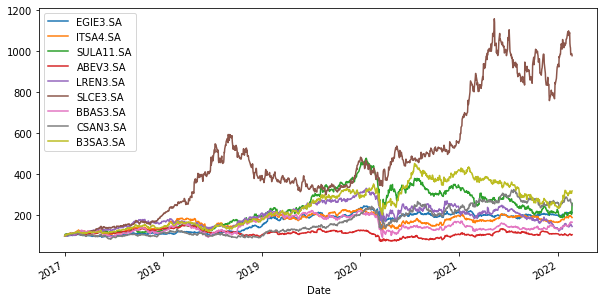

In [6]:
(carteira / carteira.iloc[0] * 100).plot(figsize = (10, 5))

Calcule seus retornos logarítmicos.

In [5]:
ret_log = np.log(carteira / carteira.shift(1))
ret_log

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
Date,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.038006,0.042915,0.047429,0.020031,0.030222,0.006798,0.044736,0.045516,0.040330
2017-01-04,-0.012789,0.005817,0.036387,-0.007843,-0.008844,0.032659,-0.005222,0.000514,0.018703
2017-01-05,-0.007301,0.009238,-0.002104,0.005436,-0.009350,0.027168,-0.002446,-0.001801,-0.012235
2017-01-06,-0.012479,-0.003454,-0.007930,-0.008469,-0.011595,-0.000638,0.010788,-0.023451,-0.000586
...,...,...,...,...,...,...,...,...,...
2022-02-17,0.000493,-0.010451,0.018095,-0.015369,-0.010230,-0.006636,0.000000,-0.002621,-0.027094
2022-02-18,-0.003210,0.004764,-0.022768,-0.005402,0.013496,-0.032938,0.020174,-0.049315,0.004918
2022-02-21,0.006163,-0.029911,-0.044700,-0.021904,-0.045589,0.005261,-0.021591,-0.027016,-0.014115


In [7]:
ret_log.mean() * 250

EGIE3.SA     0.149037
ITSA4.SA     0.124913
SULA11.SA    0.185770
ABEV3.SA     0.011428
LREN3.SA     0.074095
SLCE3.SA     0.445543
BBAS3.SA     0.100118
CSAN3.SA     0.178591
B3SA3.SA     0.226667
dtype: float64

In [8]:
ret_log.cov() * 250

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
EGIE3.SA,0.058743,0.041147,0.034951,0.029775,0.049152,0.022573,0.055358,0.043302,0.049068
ITSA4.SA,0.041147,0.094725,0.049119,0.047293,0.075010,0.024161,0.102064,0.063832,0.074074
SULA11.SA,0.034951,0.049119,0.151713,0.040051,0.074085,0.034430,0.070831,0.061564,0.071904
ABEV3.SA,0.029775,0.047293,0.040051,0.089019,0.056679,0.024336,0.056609,0.048211,0.049757
LREN3.SA,0.049152,0.075010,0.074085,0.056679,0.168655,0.026703,0.105430,0.075254,0.092208
SLCE3.SA,0.022573,0.024161,0.034430,0.024336,0.026703,0.155283,0.035823,0.038337,0.038510
BBAS3.SA,0.055358,0.102064,0.070831,0.056609,0.105430,0.035823,0.175418,0.085440,0.102067
CSAN3.SA,0.043302,0.063832,0.061564,0.048211,0.075254,0.038337,0.085440,0.146371,0.076737
B3SA3.SA,0.049068,0.074074,0.071904,0.049757,0.092208,0.038510,0.102067,0.076737,0.149556


In [9]:
ret_log.corr()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
EGIE3.SA,1.000000,0.551610,0.370233,0.411746,0.493812,0.236343,0.545335,0.466981,0.523499
ITSA4.SA,0.551610,1.000000,0.409736,0.515013,0.593455,0.199215,0.791778,0.542097,0.622344
SULA11.SA,0.370233,0.409736,1.000000,0.344632,0.463144,0.224314,0.434186,0.413128,0.477355
ABEV3.SA,0.411746,0.515013,0.344632,1.000000,0.462569,0.206984,0.453007,0.422354,0.431231
LREN3.SA,0.493812,0.593455,0.463144,0.462569,1.000000,0.165005,0.612954,0.478965,0.580589
SLCE3.SA,0.236343,0.199215,0.224314,0.206984,0.165005,1.000000,0.217054,0.254290,0.252702
BBAS3.SA,0.545335,0.791778,0.434186,0.453007,0.612954,0.217054,1.000000,0.533209,0.630154
CSAN3.SA,0.466981,0.542097,0.413128,0.422354,0.478965,0.254290,0.533209,1.000000,0.518652
B3SA3.SA,0.523499,0.622344,0.477355,0.431231,0.580589,0.252702,0.630154,0.518652,1.000000


Crie uma variável que conte o número de ativos em seu portfólio.

In [11]:
num_ativo = len(acoes)

In [12]:
num_ativo

9

O portfólio não precisa ser igualmente ponderado. Então, crie uma variável chamada "pesos". Deixe que ele contenha tantos valores gerados aleatoriamente quanto os ativos em seu portfólio. Não se esqueça de que esses valores não devem ser menores que 0 nem iguais ou maiores que 1! <br />

*Dica: Existe uma função NumPy específica que permite gerar esses valores. É o que usamos no vídeo da aula - NumPy.random.random ().*

In [13]:
arr = np.random.random(9) # JEITO ERRADO!!
arr

array([0.91476493, 0.96483164, 0.47659317, 0.70607324, 0.00597155,
       0.02946539, 0.90394453, 0.24948627, 0.81941377])

In [14]:
arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8]
# VEJA QUE A SOMA NÃO DÁ IGUAL A 1!!

5.070544495281401

OU

In [16]:
np.sum(arr)
# VEJA QUE A SOMA NÃO DÁ IGUAL A 1!!

5.070544495281401

Fazendo da forma correta em que a soma dos pesos dê igual a 1

In [15]:
pesos = np.random.random(num_ativo)
pesos

array([0.93994874, 0.82439149, 0.98469739, 0.69047933, 0.30138918,
       0.83281653, 0.61182352, 0.3388705 , 0.50393367])

In [18]:
pesos /= np.sum(pesos) # é o mesmo que pesos = pesos / sum(pesos)
pesos                  # a linha acima serve para criar nove pesos cuja soma é igual a 1 

array([0.15592139, 0.13675242, 0.16334442, 0.11453869, 0.0499953 ,
       0.13814999, 0.10149104, 0.05621281, 0.08359396])

Some os valores obtidos para obter 1 - somando os pesos para 100%!

In [19]:
np.sum(pesos) # veja que agora a soma deu igual a 1

1.0

continuação na parte 2